In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('Advertising.csv')

In [ ]:
print(df.info())  # Check data types and nulls
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


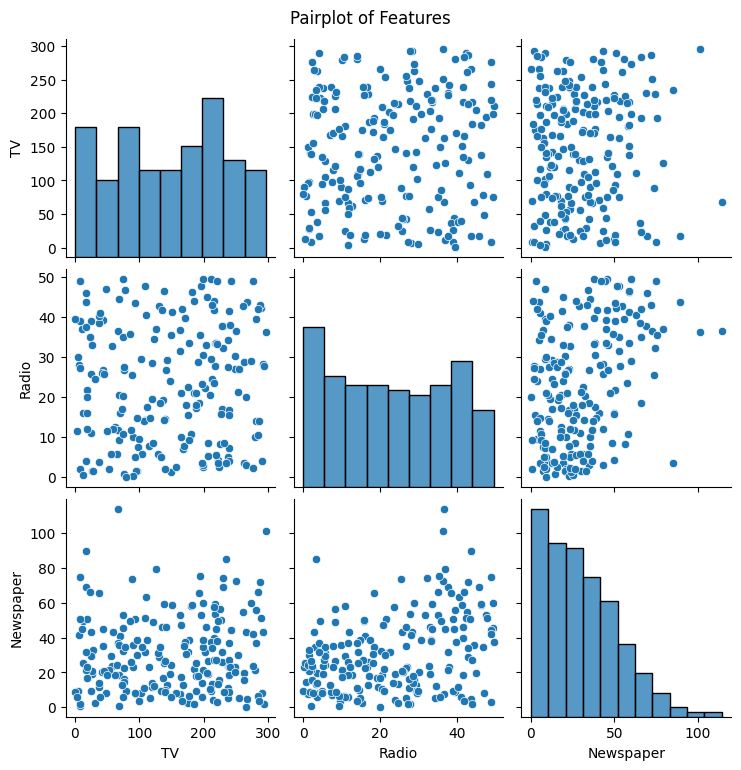

In [6]:
features = ['TV', 'Radio', 'Newspaper']
target = 'Sales'
X = df[features]
y = df[target]
sns.pairplot(X)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [9]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

In [10]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

Linear Regression --> MAE: 1.461, MSE: 3.174, RMSE: 1.782
Polynomial Regression --> MAE: 0.526, MSE: 0.413, RMSE: 0.643
SVR --> MAE: 1.514, MSE: 4.006, RMSE: 2.002


/tmp/ipython-input-35641882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rmse_values, palette='viridis')


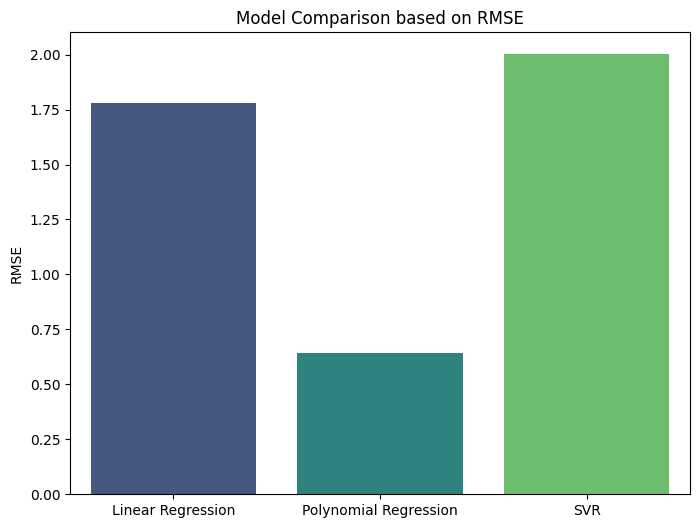

In [12]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse
metrics = {}
metrics['Linear Regression'] = evaluate_model(y_test, y_pred_lr)
metrics['Polynomial Regression'] = evaluate_model(y_test, y_pred_poly)
metrics['SVR'] = evaluate_model(y_test, y_pred_svr)

# Print metrics
for model, (mae, mse, rmse) in metrics.items():
    print(f'{model} --> MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}')

# Bar graph for comparison (using RMSE here)
models = list(metrics.keys())
rmse_values = [metrics[m][2] for m in models]

plt.figure(figsize=(8,6))
sns.barplot(x=models, y=rmse_values, palette='viridis')
plt.ylabel('RMSE')
plt.title('Model Comparison based on RMSE')
plt.show()

# 8. Apply K-Means Clustering on feature set
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

df['Cluster'] = clusters


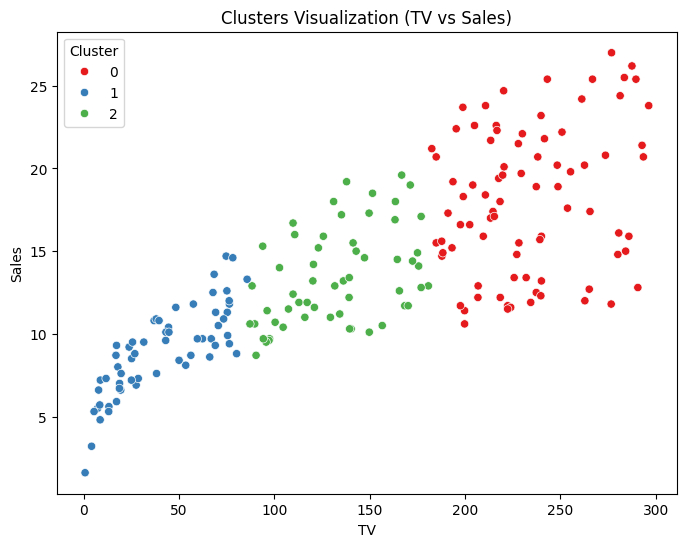

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='TV', y='Sales', hue='Cluster', palette='Set1')
plt.title('Clusters Visualization (TV vs Sales)')
plt.show()